# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize']=(15,8)

In [10]:
df = pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [11]:
df.shape

(1000, 3)

### We have 1000 records in GermanCredit Dataset

# 3. Plot Histogram for column 'CreditAmount'

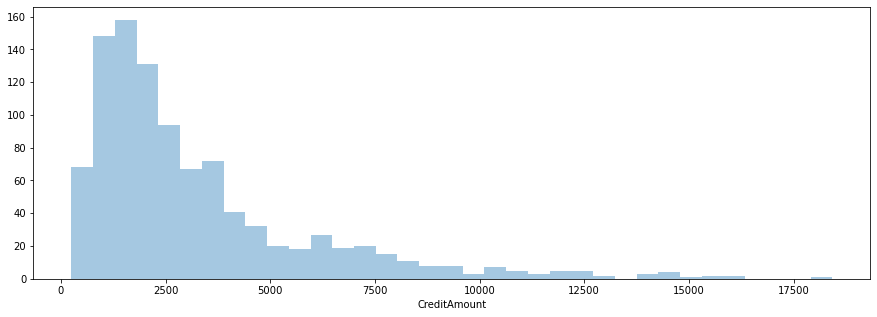

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['CreditAmount'],kde=False)
plt.show()

# 3b. Create creditability dataframe

In [28]:
df["Creditability"]=df["Creditability"].astype(object)

In [29]:
df=pd.get_dummies(df)
df.head()

,CreditAmount,DurationOfCreditInMonths,Creditability_0,Creditability_1
0,1049,18,0,1
1,2799,9,0,1
2,841,12,0,1
3,2122,12,0,1
4,2171,12,0,1


In [30]:
df_0=pd.DataFrame(df["Creditability_0"])
df_1=pd.DataFrame(df["Creditability_1"])

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [31]:
df_new = pd.concat([df_0,df_1],axis=1)
df_new.head()

,Creditability_0,Creditability_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [32]:
df_new['Creditability_0'].value_counts()

0    700
1    300
Name: Creditability_0, dtype: int64

In [ ]:
## Number of zeroes in creditability is 700
## Number of one's in creditability is 300

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

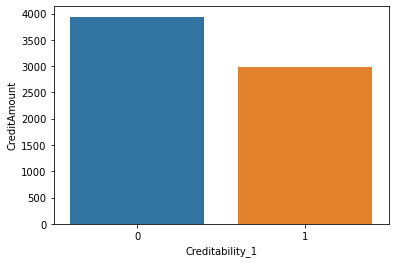

In [24]:
sns.barplot(df["Creditability_1"],df["CreditAmount"],ci=0)
plt.show()

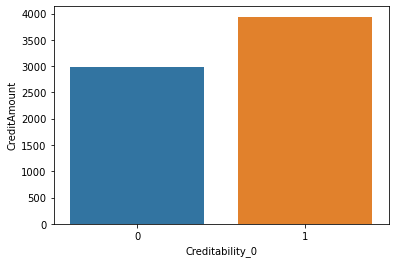

In [23]:
sns.barplot(df["Creditability_0"],df["CreditAmount"],ci=0)
plt.show()

# 6. Prepare input data for the model

In [41]:
df = pd.read_excel('GermanCredit.xlsx')

X = df.drop(["Creditability"],axis=1)
y = df["Creditability"]
Xc = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(Xc,y,test_size=0.3,random_state=10)

# 7. Fit logistic regression model

In [42]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.575767
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.04177
Time:                        23:51:17   Log-Likelihood:                -403.04
converged:                       True   LL-Null:                       -420.61
Covariance Type:            nonrobust   LLR p-value:                 2.339e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7605      0.177      9.948      0.000       1.414       2.107
CreditAmount              -5.37e-05   3.71e-05     -1.447      0.148      -0.000    1.91e-05
DurationOfCreditInMonths    -0.0317      0.009     -3.600      0.000      -0.049      -0.014
============================================================================================
"""

# 8. Test accuracy calculation

In [46]:
y_pred_prob = model.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [50]:
print('Accuracy of logistic regression model is :',accuracy_score(y_test,y_pred))
print('F1-Score of logistic regression model is :',f1_score(y_test,y_pred))

Accuracy of logistic regression model is : 0.67
F1-Score of logistic regression model is : 0.7933194154488518


# 9. Build a confusion matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 11  87]
 [ 12 190]]


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

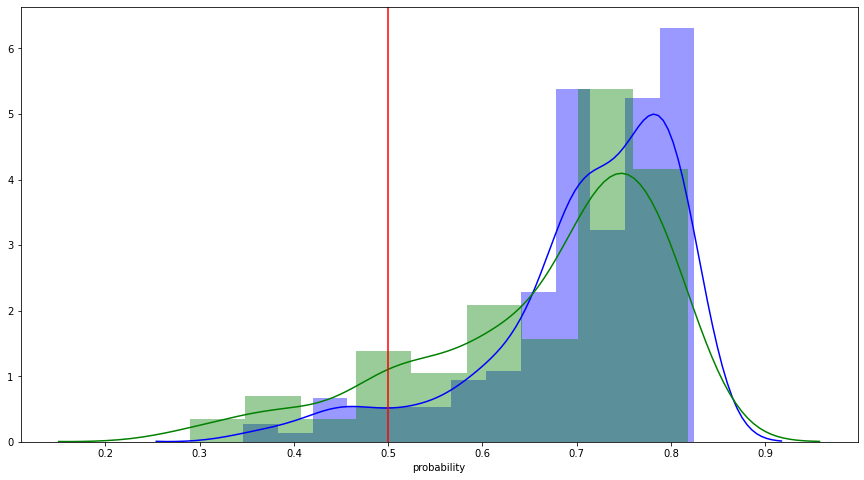

In [52]:
df['probability'] = y_pred_prob
sns.distplot(df['probability'][df["Creditability"]==1],color="blue")
sns.distplot(df['probability'][df["Creditability"]==0],color="green")
plt.axvline(0.5,color="red")
plt.show()

In [ ]:
## Model is overfitting for one class. It is predicting well for one class and not predicting for another class.